In [1]:
#-*- encoding:utf-8 -*-
import pandas as pd
from tqdm import tqdm

In [2]:
if __name__=='__main__':
  # 단어쌍의 빈도를 제그하기위해 DTM# 물러온다.
  dataset=pd.read_csv('DTM.csv')
  
  # 단어들의 목록을 가져온다.
  # 이때 0번째 인덱스에는 빈 간이 들어오므로 인덱싱을 통해 없얘준다.
  column_list = dataset.columns[1:]
  word_length = len(column_list)

  # 각 단어쌍의 빈도수를 저장할 dictionary 생성
  count_dict = {}
  for doc_number in tqdm(range(len(dataset)), desc = '단어쌍 만들기 진행중'):
    tmp = dataset.loc[doc_number] # 현재 문서의 단어 출현 빈도 데이터를 가져온다.
    for i, word1 in enumerate(column_list):
      if tmp[word1]: # 현재 문서에 젓번째 단어가 존재할 경우
        for j in range(i + 1, word_length):
          if tmp[column_list[j]]: # 현재 문서에 두번짜 단어가 존재할 경우
            count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]),0)+max(tmp[word1],tmp[column_list[j]])
# count_list에 wordl, word2, frequency 형태로 저장할 것이ct.
  count_list = []

  for words in count_dict:
    count_list.append([words[0], words[1], count_dict[words]])

# 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
df = pd.DataFrame(count_list, columns=["word1","word2","freq"])
df = df.sort_values(by=['freq'],ascending=False)
df = df.reset_index(drop=True)
# 이 작업이 오래 걸리기 때문에 csv파일로 저장 후 사용하는 것을추천 한다.
df.to_csv('networkx.csv', encoding= 'utf-8-sig')


단어쌍 만들기 진행중: 100%|██████████| 6770/6770 [07:28<00:00, 15.08it/s]


In [3]:
# 코랩 한글 폰트 설치
# import matplotlib as mpl
# import matplotlib.pyplot as plt
 
# %config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()


import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = 'C:\Windows\Fonts\HMKMMAG.TTF'

fontprop = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family=fontprop.get_name())
mpl.font_manager._findfont_cached = None


'apt'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

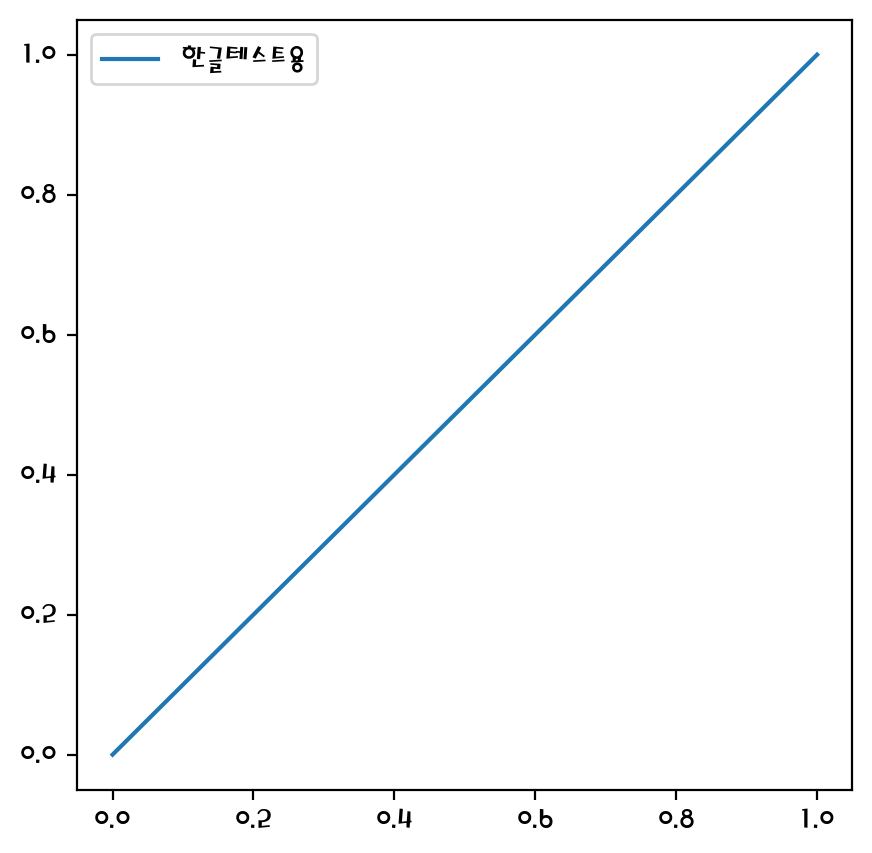

In [5]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [6]:
!pip install networkx


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import networkx as nx
import operator
import numpy as np

In [8]:
if __name__=='__main__':
  # 단어쌍의 빈도를 제거하기위해 DTM을 불러온다.
  #dataset=pd.read_csv('/content/drive/MyDrive/cuk/빅데이터연구방법론/직데실파/14주차/Data/networkx.csv')
  dataset=pd.read_csv('networkx.csv')

  # 중심성 척도 계산을 위한 그래프 작성
  G_centality = nx.Graph()

  #빈도수 200000이상 단어쌍에 대한 edge 표현
  for ind in range((len(np.where(dataset["freq"]>=20000)[0]))):
    G_centality.add_edge(dataset['word1'][ind],dataset['word2'][ind],weight=int(dataset["freq"][ind]))




In [9]:
dgr = nx.degree_centrality(G_centality) #연결중심성
btw = nx.betweenness_centrality(G_centality) #매개중심성
cls = nx.closeness_centrality(G_centality) #근접중심성
egv = nx.eigenvector_centrality(G_centality) #고유벡터중심성
pgr = nx.pagerank(G_centality) #페이지랭크

In [10]:
# 중심성이 큰 순서대로 정렬한다.
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)


In [11]:
# 단어 네트워크를 그려줄 그래프 선언
G = nx.Graph()

In [13]:
# 페이지 랭크에 따라 두 노드 사이의 연관성을 결정한다. (단어쌍의 연관성)
# 연결 중심성으로 계산한 적도에 따라 노드의 그기가 결정된다. (단어의 등장 빈도수)
for i in range(len(sorted_pgr)):
  G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

for ind in range((len(np.where(dataset['freq']>=20000)[0]))):
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

# 노드 크크기 조정
sizes=[G.nodes[node]['nodesize'] * 500 for node in G]
options ={
'edge_color':'#FFDEA2',
'width':1,
'with_labels': True,
'font_weight':'regular',
}

In [14]:
# 페이지 랭크에 따라 두 노드 사이의 연관성을 결정한다. (단어쌍의 연관성)
# 매개중심성으로 계산한 적도에 따라 노드의 그기가 결정된다. (단어의 등장 빈도수)
for i in range(len(sorted_pgr)):
  G.add_node(sorted_pgr[i][0], nodesize=sorted_btw[i][1])

for ind in range((len(np.where(dataset['freq']>=20000)[0]))):
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

  # 노드 크크기 조정
sizes=[G.nodes[node]['nodesize'] * 500 for node in G]

In [15]:
# 페이지 랭크에 따라 두 노드 사이의 연관성을 결정한다. (단어쌍의 연관성)
# 근접중심성으로 계산한 적도에 따라 노드의 그기가 결정된다. (단어의 등장 빈도수)
for i in range(len(sorted_pgr)):
  G.add_node(sorted_pgr[i][0], nodesize=sorted_cls[i][1])

for ind in range((len(np.where(dataset['freq']>=20000)[0]))):
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

  # 노드 크크기 조정
sizes=[G.nodes[node]['nodesize'] * 500 for node in G]

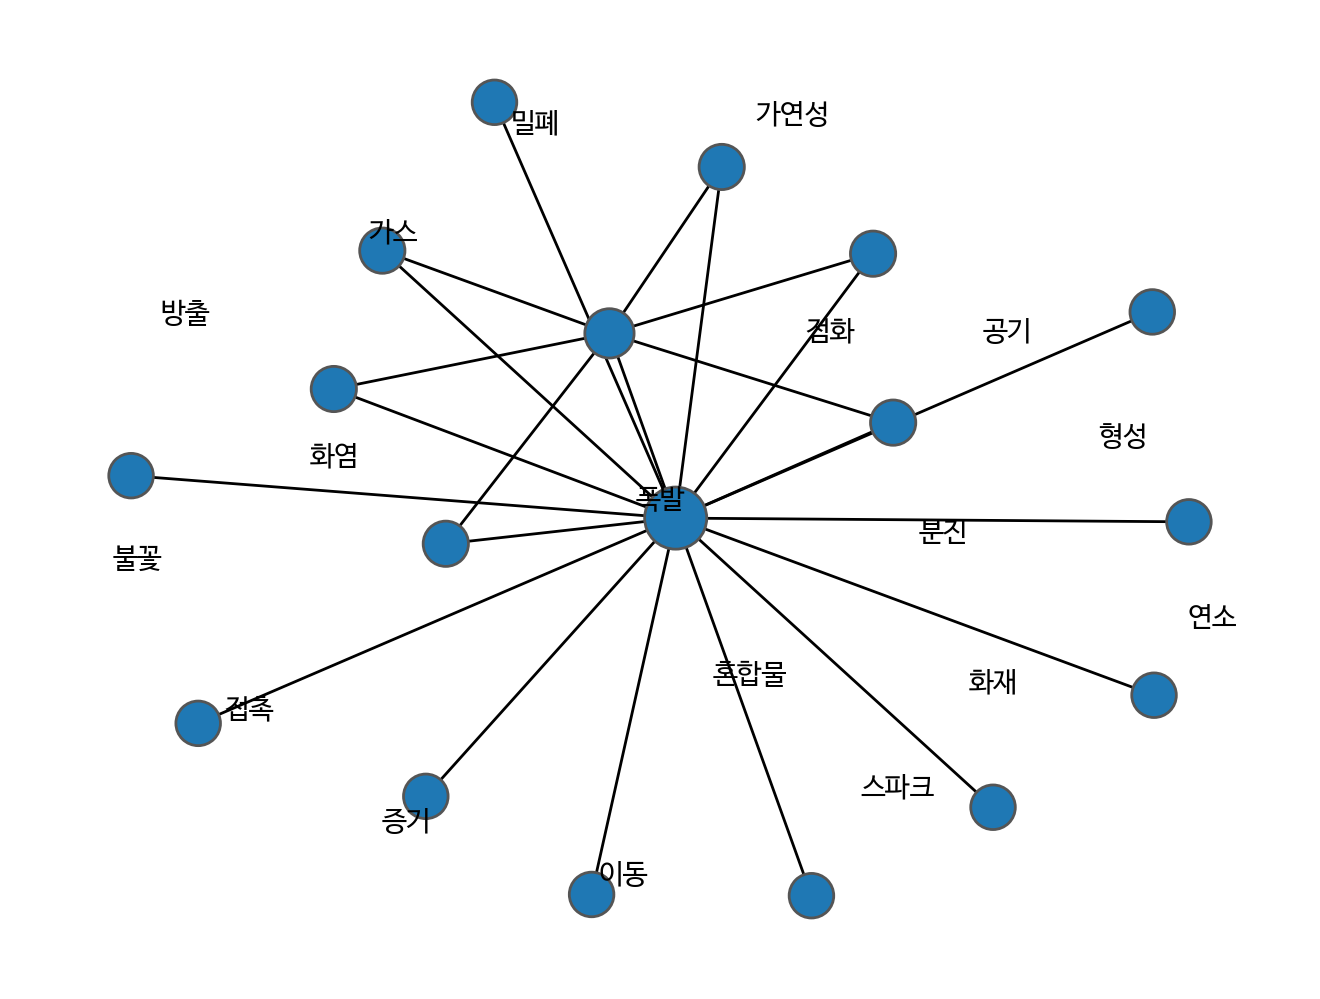

In [17]:


# 폰트 설정을 위한 font manager import
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 설정
#fm._rebuild() # 1회에 한해 실행해준다. (폰트 새로고집, 여러번 해줘도 관계는 없다.)
font_fname= 'C:\Windows\Fonts\HMKMMAG.TTF' # 여기서 폰트는 C:/Windows/Fonts를 참 고해-

fontprop = fm.FontProperties(fname=font_fname, size=15).get_name()

#print(fontprop)

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100),font_family=fontprop)
nx.draw_networkx_labels(G, pos=nx.spring_layout(G, k=1, iterations=100), font_family='NanumBarunGothic', font_size=10)

ax=plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()